In [1]:
import sys
import os
import joblib
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import extra_scripts.plot_functions as pf
import word_task.non_neural.predict as predict

INFO:pytorch_pretrained_bert.modeling:Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


In [2]:
model3 = joblib.load("../records/word_xgb/model_forward_group3_all.joblib").best_estimator_

In [3]:
importance_dict = model3.get_booster().get_score(importance_type="total_gain")
importances = [importance for _, importance in 
               sorted(importance_dict.items(), key=lambda x: int(x[0][1:]))]
normalized_importances = [importance / sum(importances) for importance in importances]

list(zip(predict.FEAT_GROUPS[3], normalized_importances))

[('OCCURS_IN_OP_PC', 0.7058389562058368),
 ('STEM_POS_DIFF', 0.1323674125473918),
 ('STEM_DEP_DIFF', 0.061126994983277685),
 ('SFS_IN_OP_NOT_PC', 0.07842605558433918),
 ('SFS_IN_PC_NOT_OP', 0.02224058067915453)]

In [4]:
LINEWIDTH = 5
FIG_SIZE = (8, 7)

def plot_bar(value_lists, xlabel=None, fig_size=FIG_SIZE,
        fig_pos=None, ylabel=None, xticklabel=None,
        xlabel_rotation=None, width=-1, gap=1, yticklabel=None, legend=None,
        errorbar_list=None, color_list=sns.color_palette(n_colors=10), ylim=None, ncol=1,
        handlelength=None, loc=0, bbox_to_anchor=None,
        handletextpad=None, columnspacing=None, vlines=None, hlines=None,
        hatches=None):
    fig, ax = pf.start_plotting(fig_size, fig_pos)
    N = len(value_lists[0])
    if width < 0:
        width = 0.75 * gap / len(value_lists)
    ind = np.arange(N) * gap
    rects = []
    for i in range(len(value_lists)):
        rect = ax.bar(ind, value_lists[i], width, color=color_list[i],
                yerr=errorbar_list[i] if errorbar_list else None, error_kw={"ecolor": "black"},
                hatch=None if not hatches else hatches[i])
        ind = ind + width
        rects.append(rect)
    xlim = (-width, max(ind))
    if hlines:
        for y in hlines:
            ax.axhline(y=y, linestyle='--', color='grey')
    if vlines:
        for x in vlines:
            ax.axvline(x=x, linestyle='--', color='grey')
    if legend:
        ax.legend(rects, legend, loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                ncol=ncol, handlelength=handlelength,
                handletextpad=handletextpad,
                columnspacing=columnspacing,
                frameon=False)
    pf.end_plotting(fig, ax, xlabel=xlabel, ylabel=ylabel,
            xticklabel=(ind - width * len(value_lists), xticklabel) if xticklabel else None,
            xlabel_rotation=xlabel_rotation, xlim=xlim,
            yticklabel=yticklabel, ylim=ylim)
    plt.setp( ax.xaxis.get_majorticklabels(), ha="right", rotation_mode="anchor")
    plt.gca().set_yticklabels(["0", "20", "40", "60", "80"])

    # Create offset transform by 5 points in x direction
    dx = 15
    labels = ax.xaxis.get_majorticklabels()
    for i, label in enumerate(labels):
        offset = matplotlib.transforms.ScaledTranslation((dx*i)/72, 0, fig.dpi_scale_trans)
        label.set_transform(label.get_transform() + offset)
    return fig

/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_man

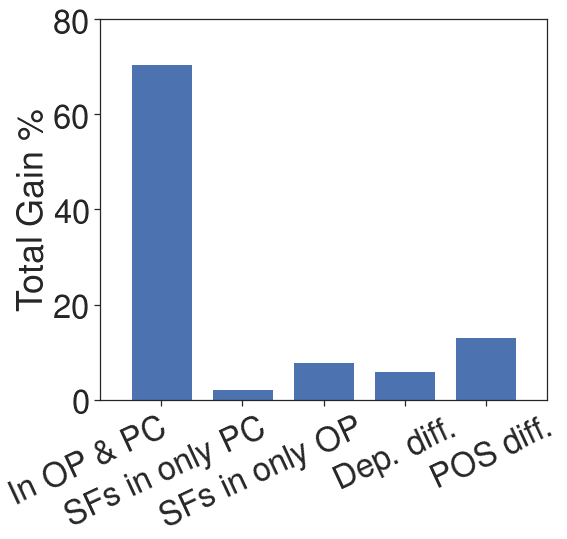

In [5]:
palette = sns.color_palette(n_colors=10)
color_list = palette
hatches = ['//', '\\', 'x', '+', '\\']
labels = ["In OP \& PC", "SFs in only PC", "SFs in only OP", "Dep. diff.", "POS diff."]
normalized_importances = [[0.7058389562058368, 
                           0.02224058067915453, 
                           0.07842605558433918,
                           0.061126994983277685,
                           0.1323674125473918]]

fig = plot_bar(normalized_importances,
                  ylabel="Total Gain \\%", xlabel="", xticklabel=labels,
                  xlabel_rotation=25, color_list=color_list, bbox_to_anchor=(0.24, 1), handletextpad=0.4)
fig.savefig("../records/plots/group3-feat-importance.png", bbox_inches="tight")